In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 심사 기준     : **RMSLE(Root Mean Squared Logarithmic Error)** of ECLO  
- ECLO         : 인명피해 심각도(Equivalent Casualty Loss Only)  
- **ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1**
- 다른 유형의 사고들을 부상자 기준으로 환산하여 사고의 심각 정도와 위험도를 표현하는 방법  
- 부상자       : 교통사고로 인하여 5일 미만의 치료를 요하는 부상을 입은 경우   
- Public Score : 전체 테스트 데이터 중 30%  
- Private Score: 전체 테스트 데이터 중 70%  

In [2]:
train = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/train.csv')
test = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/test.csv')
sample = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/sample_submission.csv')
accident = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/countrywide_accident.csv')
cctv = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 CCTV 정보.csv', encoding='euc-kr')
light = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 보안등 정보.csv', encoding='euc-kr')
kid = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 어린이 보호 구역 정보.csv', encoding='euc-kr')
park = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 주차장 정보.csv', encoding='euc-kr')

In [3]:
def rmsle(y_true, y_pred):
    """
    Root Mean Squared Logarithmic Error (RMSLE) 계산
    
    Parameters:
    - y_true: 실제 값 배열
    - y_pred: 예측 값 배열
    
    Returns:
    - rmsle_score: RMSLE 점수
    """
    assert len(y_true) == len(y_pred), "입력 배열의 길이가 같아야 합니다."
    
    # 각 값에 1을 더하고 로그 취하기
    log_diff = np.log1p(y_pred) - np.log1p(y_true)
    
    # 제곱하기
    squared_log_diff = np.square(log_diff)
    
    # 평균 구하기
    mean_squared_log_diff = np.mean(squared_log_diff)
    
    # 제곱근 취하기
    rmsle_score = np.sqrt(mean_squared_log_diff)
    
    return rmsle_score

In [4]:
train.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

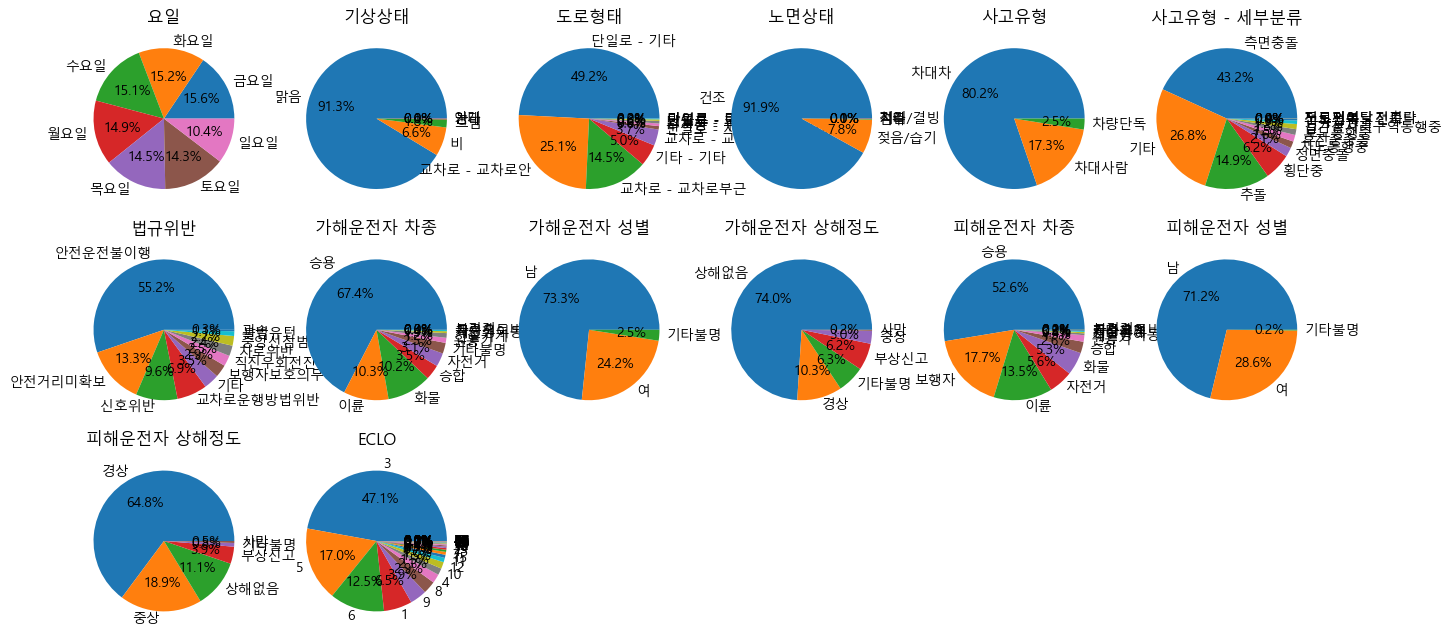

In [5]:
plt.figure(figsize=(16,16))
for i, column in enumerate(train.columns[[2,3,5,6,7,8,9,10,11,13,14,15,17,22]]):
    plt.subplot(6,6,i+1)
    plt.pie(train[column].value_counts(), labels=train[column].value_counts().index, autopct='%1.1f%%')
    plt.title(column)
plt.show()

In [4]:
# pca = PCA()
# pca.fit(X_train_sc)

# # 주성분별 고유값 추출
# eigenvalues = pca.explained_variance_

# # 스크리 플롯 그리기
# plt.figure(figsize=(8, 6))
# plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
# plt.xlabel('주성분 번호')
# plt.ylabel('고유값')
# plt.title('Scree Plot')
# plt.show()

# # 누적 설명된 분산의 비율 계산
# cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# # 80% 이상의 설명된 분산을 가지는 주성분 개수 확인
# n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# # 결과 출력
# print(f"80% 이상의 설명된 분산을 가지는 주성분의 개수: {n_components}")

In [45]:
# parms = {'max_depth': [3, 5, 7, 9],
#          'learning_rate': [0.01, 0.05, 0.1],
#          'n_estimators': [100,300, 500],
#          'subsample': [0.8, 0.9, 1.0],
#          'colsample_bytree': [0.8, 0.9, 1.0]
#          }

# grid = GridSearchCV(xgb, parms, cv=5, n_jobs=-1)

# grid.fit(X_train_sc, y_train)

# print(grid.best_params_)

# y_pred = grid.predict(X_test_sc)

# print(mean_squared_error(y_test, y_pred))
# print(r2_score(y_test, y_pred))
# print(mean_absolute_error(y_test, y_pred))
# print(mean_absolute_percentage_error(y_test, y_pred))
# print(rmsle(y_test, y_pred))

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA

# xgb = XGBRegressor()
# scaler = StandardScaler()
# X2 = pd.get_dummies(X2)
# test_file = pd.get_dummies(test.drop(['ID', '시군구', '사고일시'], axis=1))
# X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# X_train_sc = scaler.fit_transform(X_train)
# X_test_sc = scaler.transform(X_test)
# test_file_sc = scaler.transform(test_file)

# XD = pd.get_dummies(X2)
# X_deep_sc = scaler.fit_transform(XD)
# X_deep_sc.shape
# y_deep = XD['ECLO']

In [5]:
train = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/train.csv')
test = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/test.csv')
sample = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/sample_submission.csv')
accident = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/countrywide_accident.csv')
cctv = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 CCTV 정보.csv', encoding='euc-kr')
light = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 보안등 정보.csv', encoding='euc-kr')
kid = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 어린이 보호 구역 정보.csv', encoding='euc-kr')
park = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/Daegu/external_open/대구 주차장 정보.csv', encoding='euc-kr')

In [6]:
train.drop(['ID', '사고일시', '시군구'], axis=1, inplace=True)
test.drop(['ID', '사고일시', '시군구'], axis=1, inplace=True)
accident.drop(['ID', '사고일시', '시군구'], axis=1, inplace=True)
train = train.dropna()
accident = accident.dropna()
train = train[train['피해운전자 연령'] != '미분류']
train = train[train['가해운전자 연령'] != '미분류']
accident = accident[accident['피해운전자 연령'] != '미분류']
accident = accident[accident['가해운전자 연령'] != '미분류']

In [7]:
train['피해운전자 연령'] = train['피해운전자 연령'].apply(lambda x: '90' if x == '90세 이상' else x)
train['피해운전자 연령'] = train['피해운전자 연령'].apply(lambda x: '98' if x == '98세 이상' else x)
train['피해운전자 연령'] = train['피해운전자 연령'].apply(lambda x: '98' if x == '98 이상' else x)
train['가해운전자 연령'] = train['가해운전자 연령'].apply(lambda x: '90' if x == '90세 이상' else x)
train['가해운전자 연령'] = train['가해운전자 연령'].apply(lambda x: '90' if x == '98세 이상' else x)
accident['가해운전자 연령'] = accident['가해운전자 연령'].apply(lambda x: '90' if x == '90세 이상' else x)
accident['가해운전자 연령'] = accident['가해운전자 연령'].apply(lambda x: '90' if x == '98세 이상' else x)
accident['피해운전자 연령'] = accident['피해운전자 연령'].apply(lambda x: '90' if x == '90세 이상' else x)
accident['피해운전자 연령'] = accident['피해운전자 연령'].apply(lambda x: '98' if x == '98세 이상' else x)

In [8]:
train['피해운전자 연령'] = [i.replace('세', '') for i in train['피해운전자 연령']]
train['피해운전자 연령'] = train['피해운전자 연령'].astype(int)

train['가해운전자 연령'] = [i.replace('세', '') for i in train['가해운전자 연령']]
train['가해운전자 연령'] = train['가해운전자 연령'].astype(int)

accident['피해운전자 연령'] = [i.replace('세', '') for i in accident['피해운전자 연령']]
accident['피해운전자 연령'] = accident['피해운전자 연령'].astype(int)

accident['가해운전자 연령'] = [i.replace('세', '') for i in accident['가해운전자 연령']]
accident['가해운전자 연령'] = accident['가해운전자 연령'].astype(int)

In [9]:
train['가해운전자 성별'] = train['가해운전자 성별'].apply(lambda x: 0 if x == '남' else 1 if x == '여' else 2)
train['피해운전자 성별'] = train['피해운전자 성별'].apply(lambda x: 0 if x == '남' else 1 if x == '여' else 2)
accident['피해운전자 성별'] = accident['피해운전자 성별'].apply(lambda x: 0 if x == '남' else 1 if x == '여' else 2)
accident['가해운전자 성별'] = accident['가해운전자 성별'].apply(lambda x: 0 if x == '남' else 1 if x == '여' else 2)

In [10]:
train['가해운전자 상해정도'] = train['가해운전자 상해정도'].apply(lambda x: 0 if x == '상해없음' else 1 if x == '부상신고' or x == '기타불명' else 3 if x == '경상' else 5 if x == '중상' else 10)
train['피해운전자 상해정도'] = train['피해운전자 상해정도'].apply(lambda x: 0 if x == '상해없음' else 1 if x == '부상신고' or x == '기타불명' else 3 if x == '경상' else 5 if x == '중상' else 10)
accident['피해운전자 상해정도'] = accident['피해운전자 상해정도'].apply(lambda x: 0 if x == '상해없음' else 1 if x == '부상신고' or x == '기타불명' else 3 if x == '경상' else 5 if x == '중상' else 10)
accident['가해운전자 상해정도'] = accident['가해운전자 상해정도'].apply(lambda x: 0 if x == '상해없음' else 1 if x == '부상신고' or x == '기타불명' else 3 if x == '경상' else 5 if x == '중상' else 10)

In [11]:
accident = accident[accident['노면상태'] != '해빙']
accident = accident[accident['도로형태'] != '단일로 - 철길건널목']
accident = accident[accident['사고유형 - 세부분류'] != '철길건널목']
accident = accident[accident['사고유형'] != '철길건널목']

In [12]:
accident['사고유형'] = accident['사고유형'].apply(lambda x: 0 if x == '차대차' else 1 if '차대사람' else 2)
train['사고유형'] = train['사고유형'].apply(lambda x: 0 if x == '차대차' else 1  if'차대사람' else 2)
test['사고유형'] = test['사고유형'].apply(lambda x: 0 if x == '차대차' else 1 if '차대사람' else 2)

<Figure size 640x480 with 0 Axes>

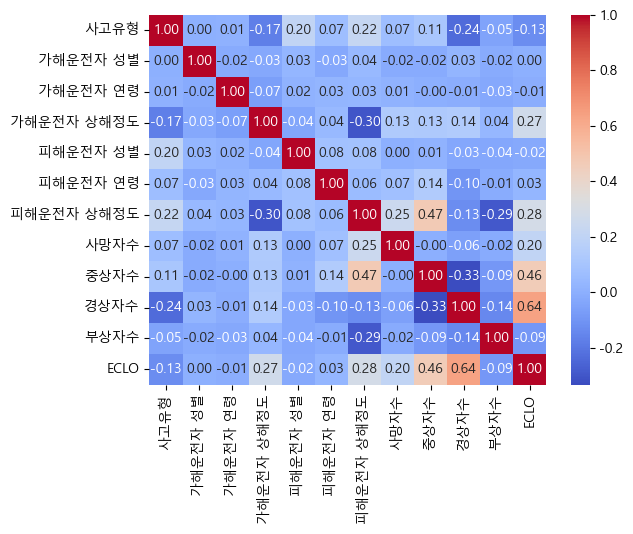

<Figure size 640x480 with 0 Axes>

In [468]:
plt.figure()
sns.heatmap(train.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')
plt.figure()

In [13]:
X_train = pd.get_dummies(train.drop('ECLO', axis=1))
X_test = pd.get_dummies(test)
X_accident = pd.get_dummies(accident.drop('ECLO', axis=1))

y_train = train['ECLO']
y_accident = accident['ECLO']

In [37]:
# 스케일링
import tensorflow as tf
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

tmp =  X2_test.iloc[:,:30]

X2_train_tensor = tf.convert_to_tensor(X2_train, dtype=tf.float32)
X2_test_tensor = tf.convert_to_tensor(X2_test, dtype=tf.float32)
from sklearn.preprocessing import StandardScaler

# X2_train과 X_test를 NumPy 배열로 변환합니다.
X2_train_array = X2_train.values
X_test_array = X_test.values
tmp_array = tmp.values

# 공통 특성에 대한 스케일러를 만듭니다.
scaler_common = StandardScaler()

# X2_train_array와 X_test_array에서 공통된 부분의 특성만 스케일링합니다.
common_features_train = scaler_common.fit_transform(X2_train_array[:, -30:])
common_features_test = scaler_common.transform(X_test_array)
common_features_tmp = scaler_common.transform(tmp_array)

# X2_train_array에만 있는 나머지 특성들을 스케일링합니다.
scaler_additional = StandardScaler()
additional_features_train = scaler_additional.fit_transform(X2_train_array[:, :-30])

# 스케일된 데이터를 다시 합칩니다.
X2_train_scaled = np.hstack((additional_features_train, common_features_train))

# X_test_array는 이미 스케일링되었습니다.
X_test_scaled = common_features_test
tmp_scaled = common_features_tmp

# 이제 X2_train_scaled와 X_test_scaled를 사용하여 모델 학습을 진행할 수 있습니다.


In [477]:
# # 0으로 패딩
# scaler = StandardScaler()

# # train 데이터를 transform
# X_accident_sc = scaler.fit_transform(X_accident)
# X_train_sc = scaler.transform(X_train)

# # test 데이터의 특성 개수를 train 데이터에 맞추기
# # 모든 특성을 숫자로 변환한 후에 패딩
# max_features = X_accident.shape[1]
# X_test_adjusted = X_test.astype(float)  # 모든 특성을 숫자로 변환
# X_test_adjusted = np.hstack([X_test_adjusted, np.zeros((X_test_adjusted.shape[0], max_features - X_test_adjusted.shape[1]))])

# # test 데이터를 transform
# X_test_sc = scaler.transform(X_test_adjusted)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

X_accident_tensor = tf.convert_to_tensor(X_accident, dtype=tf.float32)
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)

# 1. 기본 모델 훈련
input_shape = (X_accident_tensor.shape[1],)
output_shape = (X_test_tensor.shape[1],)

# 기본 모델 구성
input_layer = Input(shape=input_shape)
x = Dense(512, activation='relu')(input_layer)
x = BatchNormalization()(x) 
x = Dropout(0.5)(x)  
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x) 
x = Dropout(0.3)(x)  
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x) 
x = Dropout(0.3)(x)  
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x) 
x = Dropout(0.3)(x)  
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x) 
x = Dropout(0.3)(x)  
x = Dense(16, activation='relu')(x)
x = BatchNormalization()(x) 
output_layer = Dense(output_shape[0], activation='linear')(x)

base_model = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일 및 훈련
base_model.compile(optimizer='adam', loss='mean_squared_error')

# # 훈련 데이터셋을 사용하여 모델을 훈련
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# base_model.fit(X_accident_tensor, y_accident, validation_split=0.2, batch_size=256, epochs=1, callbacks=[early_stopping])

In [495]:
# 2. 모델의 재조정(재훈련)
# 재조정할 부분 선택
selected_layer = base_model.layers[-3]  # 선택할 층을 기준으로 잡습니다.

x = Dense(256, activation='relu')(selected_layer.output)
x = Dropout(0.3)(x)  
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)  
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)  
x = BatchNormalization()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)  
x = BatchNormalization()(x)
x = Dense(16, activation='relu')(x)
x = BatchNormalization()(x)
adjusted_output_layer = Dense(1, activation='linear')(x)

# 기존 모델의 입력층과 선택한 층을 사용하여 새로운 모델을 만듭니다.
adjusted_model = Model(inputs=base_model.input, outputs=adjusted_output_layer)

# 모델 컴파일 및 재훈련
adjusted_model.compile(optimizer='adam', loss='mean_squared_error')

# 테스트 데이터셋을 사용하여 모델을 재훈련
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
adjusted_model.fit(X_train_tensor, y_train, validation_split=0.2, batch_size=256, epochs=5, callbacks=[early_stopping])


Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 22.3468 - val_loss: 21.7167
Epoch 2/5
118/118 [==============================] - 1s 10ms/step - loss: 12.8397 - val_loss: 9.5882
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 4.6550 - val_loss: 5.7541
Epoch 4/5
118/118 [==============================] - 1s 11ms/step - loss: 1.3749 - val_loss: 2.6462
Epoch 5/5
118/118 [==============================] - 1s 10ms/step - loss: 0.7560 - val_loss: 1.2913


In [496]:
# 3. 파인 튜닝
# 여기에서는 필요한 경우 모델의 하이퍼파라미터를 조정합니다.

# 4. 최종 모델 평가 및 적용
# 여기서는 파인 튜닝된 모델을 최종적으로 평가하고, 실제 테스트 데이터에 적용하여 예측을 수행합니다.
# final_loss = adjusted_model.evaluate(test_features, test_labels)
predictions = adjusted_model.predict(X_test_tensor)

ValueError: in user code:

    File "c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_50" is incompatible with the layer: expected shape=(None, 86), found shape=(None, 30)


In [476]:
sample.drop('ECLO', axis=1, inplace=True)
sample['ECLO'] = predictions
sample.to_csv('submission6_DL_2.csv', index=False)

In [123]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model

# 입력 레이어 정의
input_layer = Input(shape=(X2_train_scaled.shape[1],))


# Dense 레이어 추가
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
# 출력 레이어

output_layer = Dense(tmp_scaled.shape[1], activation='linear')(x)

# 모델 생성
model = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True)
history = model.fit(X2_train_scaled, y2_train, validation_split=0.2, 
                             batch_size=64, epochs=500, callbacks=[early_stopping])



Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 86)]              0         
                                                                 
 dense_203 (Dense)           (None, 64)                5568      
                                                                 
 dropout_111 (Dropout)       (None, 64)                0         
                                                                 
 batch_normalization_125 (B  (None, 64)                256       
 atchNormalization)                                              
                                                                 
 dense_204 (Dense)           (None, 64)                4160      
                                                                 
 dropout_112 (Dropout)       (None, 64)                0         
                                                          

In [124]:
model.save('models/transfer_model_1.h5')

In [125]:
from keras.models import load_model, Model
from keras.layers import Input, Dense

# 전이 학습된 모델 불러오기
transfer_model = load_model('./models/transfer_model_1.h5')

# 새 입력 레이어 정의 (tmp_scaled의 형태에 맞춤)
new_input = Input(shape=(30,))

# 새로운 첫 번째 Dense 레이어 추가
x = Dense(32, activation='relu')(new_input)

# 기존 전이 학습 모델의 두 번째 레이어부터 연결
for layer in transfer_model.layers[2:]:
    x = layer(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

# 마지막에 하나의 출력 노드를 가진 Dense 레이어 추가
x = Dense(1, activation='linear')(x)

# 새로운 모델 생성
new_regression_model = Model(inputs=new_input, outputs=x)

# 모델 컴파일
new_regression_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약 출력
new_regression_model.summary()

# 조기 중단 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습 (이번에는 tmp_scaled를 사용)
history = new_regression_model.fit(tmp_scaled, y2_train, validation_split=0.2, 
                                   batch_size=64, epochs=100, callbacks=[early_stopping])


ValueError: Exception encountered when calling layer "batch_normalization_125" (type BatchNormalization).

Dimensions must be equal, but are 32 and 64 for '{{node batch_normalization_125/batchnorm/mul_1}} = Mul[T=DT_FLOAT](Placeholder, batch_normalization_125/batchnorm/mul)' with input shapes: [?,32], [64].

Call arguments received by layer "batch_normalization_125" (type BatchNormalization):
  • inputs=tf.Tensor(shape=(None, 32), dtype=float32)
  • training=None
  • mask=None

In [115]:
# 예측 결과 확인
p = new_regression_model.predict(tmp_scaled)

p.shape, y2_test.shape


# 예측 결과가 다차원 배열인 경우 1차원 배열로 변환
if p.ndim > 1:
    p = p.flatten()

# 예측 결과의 형태와 실제 값의 형태 확인
print("예측 결과의 형태:", p.shape)
print("실제 값의 형태:", y2_test.shape)

# RMSLE 계산
rmsle_score = rmsle(y2_test, p)
print("RMSLE 점수:", rmsle_score)


235/235 [==============================] - 0s 768us/step
예측 결과의 형태: (7514,)
실제 값의 형태: (7514,)
RMSLE 점수: 0.463382267515961


Epoch 1/100
376/376 [==============================] - 2s 2ms/step - loss: 33.3198 - val_loss: 31.1766
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 30.7108 - val_loss: 28.3156
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 27.9613 - val_loss: 25.3245
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 24.9360 - val_loss: 22.0765
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 21.7416 - val_loss: 18.7904
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 18.8020 - val_loss: 15.8150
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 16.3192 - val_loss: 13.4746
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 14.3436 - val_loss: 11.7482
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 13.1304 - val_loss: 10.7595
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - los

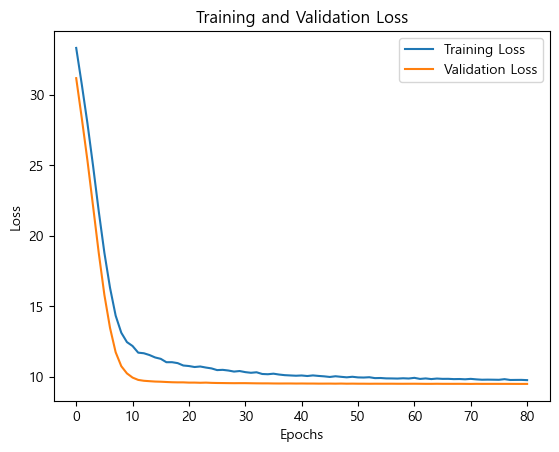

235/235 [==============================] - 0s 612us/step


In [381]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터의 shape 정의
input_shape_X2 = (86,)
input_shape_X_test = (30,)

# X2_train_tensor를 X_test_tensor의 shape에 맞게 변환
def reshape_X2_train(X2_train, input_shape_X_test):
    return X2_train[:, -input_shape_X_test[0]:]

# 더 간단하면서도 효율적인 모델 구조로 변경
def create_improved_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input_layer)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    output_layer = Dense(1)(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# 모델 컴파일
improved_model = create_improved_model(input_shape_X_test)
improved_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# 변환된 X2_train_tensor 준비
# 여기서는 실제 데이터를 사용하지 않고 예시를 위한 코드로 제시
# X2_train_tensor = ... (실제 데이터를 여기에 할당)
X2_train_reshaped = reshape_X2_train(X2_train_scaled, input_shape_X_test)

# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = improved_model.fit(X2_train_reshaped, y2_train, validation_split=0.2, 
                             batch_size=64, epochs=100, callbacks=[early_stopping])

# 학습 과정에서의 손실 추적
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# 손실 그래프 시각화
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [385]:
# 모델 예측
predictions = improved_model.predict(X_test_tensor)
pred = predictions.flatten()
pred
# rmsle(y2_test, pred)

343/343 [==============================] - 0s 705us/step


array([5.1238   , 5.318885 , 5.295816 , ..., 5.4278846, 5.2609982,
       5.2609982], dtype=float32)

In [386]:
sample.drop('ECLO', axis=1, inplace=True)
sample['ECLO'] = pred
# sample.to_csv('submission_3.csv', index=False)
sample

,ID,ECLO
0,ACCIDENT_39609,5.123800
1,ACCIDENT_39610,5.318885
2,ACCIDENT_39611,5.295816
3,ACCIDENT_39612,5.427885
4,ACCIDENT_39613,5.295816
...,...,...
10958,ACCIDENT_50567,5.175027
10959,ACCIDENT_50568,5.427885
10960,ACCIDENT_50569,5.427885
10961,ACCIDENT_50570,5.260998


In [339]:
y_train.shape

(100, 1)

In [230]:
rmsle(y2_test, predictions)

0.11155335460648617

In [179]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
transfer_model.fit(X_accident_tensor, y_accident, validation_split=0.2, batch_size=256, epochs=5, callbacks=[early_stopping])

In [274]:
print(X2_train_tensor.shape)
print(X_test_tensor.shape)
print(y2_train.shape)


(30053, 86)
(10963, 30)
(30053,)


Epoch 1/500
376/376 [==============================] - 2s 2ms/step - loss: 33.6506 - val_loss: 31.1183
Epoch 2/500
376/376 [==============================] - 1s 2ms/step - loss: 30.5350 - val_loss: 28.0503
Epoch 3/500
376/376 [==============================] - 1s 2ms/step - loss: 27.6092 - val_loss: 24.9450
Epoch 4/500
376/376 [==============================] - 1s 2ms/step - loss: 24.6707 - val_loss: 21.5243
Epoch 5/500
376/376 [==============================] - 1s 2ms/step - loss: 21.5367 - val_loss: 18.2194
Epoch 6/500
376/376 [==============================] - 1s 2ms/step - loss: 18.7047 - val_loss: 15.2403
Epoch 7/500
376/376 [==============================] - 1s 2ms/step - loss: 16.3358 - val_loss: 13.0901
Epoch 8/500
376/376 [==============================] - 1s 2ms/step - loss: 14.4603 - val_loss: 11.4382
Epoch 9/500
376/376 [==============================] - 1s 2ms/step - loss: 13.2718 - val_loss: 10.5165
Epoch 10/500
376/376 [==============================] - 1s 2ms/step - los

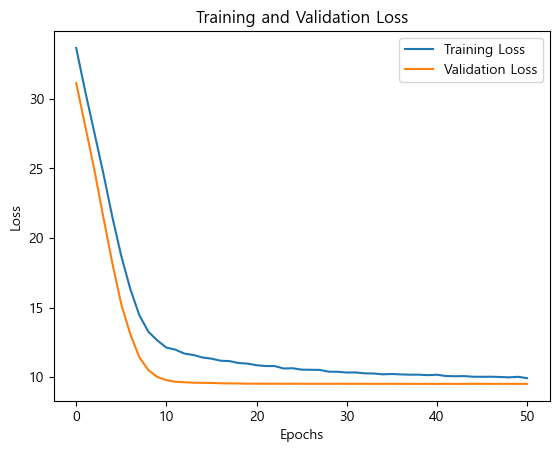

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터의 shape 정의
input_shape_X_train = (86,) # 훈련 데이터의 원래 shape
input_shape_X_test = (30,)  # 테스트 데이터의 shape

# 훈련 데이터를 테스트 데이터의 shape에 맞게 변환하는 함수
def reshape_X_train(X_train, input_shape_X_test):
    return X_train[:, -input_shape_X_test[0]:]

# 간단하고 효율적인 모델 구조 정의
def create_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input_layer)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    output_layer = Dense(1)(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# 모델 컴파일
model = create_model(input_shape_X_test)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# 훈련 데이터 변환
X_train_reshaped = reshape_X_train(X2_train_scaled, input_shape_X_test)

# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_reshaped, y2_train, validation_split=0.2, 
                    batch_size=64, epochs=500, callbacks=[early_stopping])

# 학습 과정에서의 손실 추적
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# 손실 그래프 시각화
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
prediction = model.predict(tmp_scaled)
prediction = prediction.flatten()
rmsle(y2_test, prediction)

235/235 [==============================] - 0s 618us/step


1.4546122189128587